<a href="https://colab.research.google.com/github/navyasancheti/Textile-Defect-Detection/blob/main/Boundary_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Textile Defect Detection using Masking, Image Filters & Hough Transform**

In [58]:
#importing relevant libraries

import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import cv2
import os

from skimage.filters import gabor
from skimage import data, io,color
from skimage.color import rgb2gray
import numpy as np

from scipy import ndimage
from sklearn.cluster import KMeans
import PIL



In [2]:
#loading images

def load_images_from_folder(folder):
    images = []
    cnt=0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    
    return images

imgs = load_images_from_folder("/content/drive/MyDrive/Masking-Hackfest/New_Defects")


def load_images_from_folder(folder):
    images = []
    cnt=0
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    
    return images

holes = load_images_from_folder("/content/drive/MyDrive/Masking-Hackfest/Hole")

### **Images of samples**

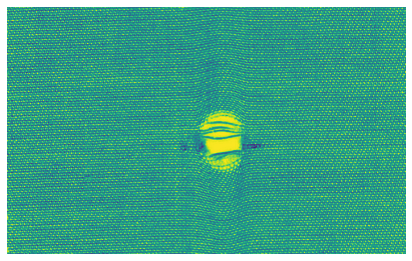

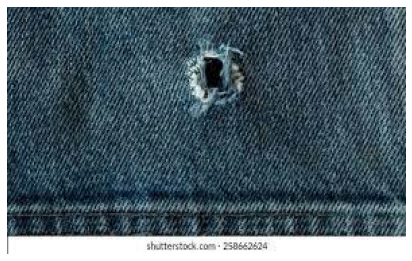

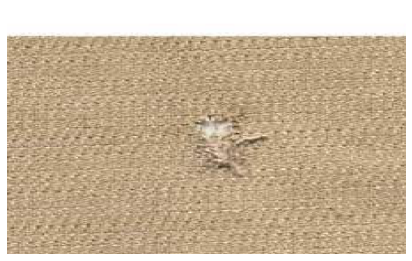

In [ ]:
rows = 2
os.chdir('/content/drive/MyDrive/Masking-Hackfest/Hole')
files = os.listdir('/content/drive/MyDrive/Masking-Hackfest/Hole/')

for num, x in enumerate(files):
    img = PIL.Image.open(x)
    plt.figure(figsize=(50,10))
    plt.subplot(rows,6,num+1)
    plt.axis('off')
    plt.imshow(img,aspect="auto")

In [144]:
#taking an image for transformation
a=imgs[3]
b=cv2.cvtColor(a, cv2.COLOR_BGR2GRAY) #grayscale


## **Gabor filter banks for texture classification**




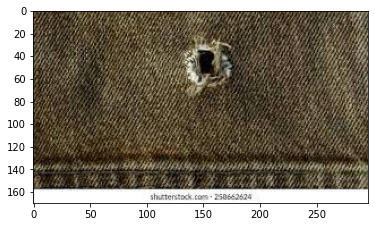

In [145]:
plt.imshow(a)

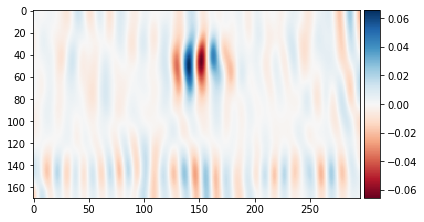

In [8]:
# less sensitivity to finer details with the lower frequency kernel
image=b
filt_real, filt_imag = gabor(image, frequency=0.05)
plt.figure()            
io.imshow(filt_real)    
io.show()  

#dark patch is showing hole present in the image

## **Gray Scale Image Transformation**




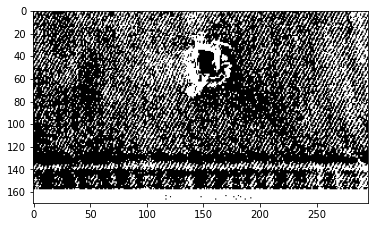

In [24]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

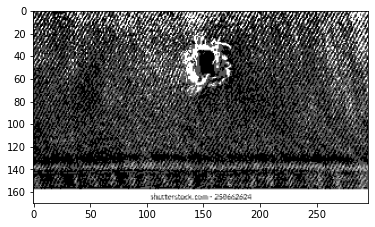

In [26]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

## **Hough Transformation for detecting defects**

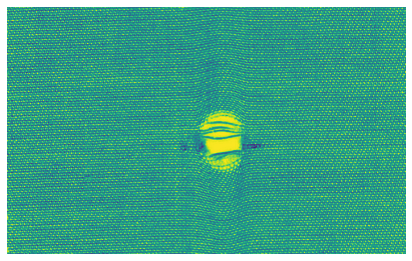

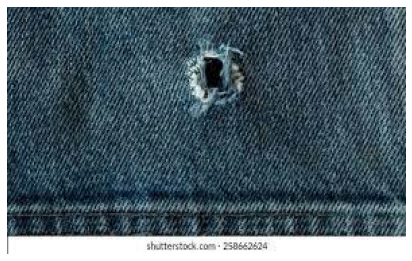

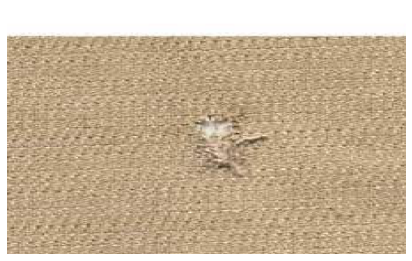

In [132]:
rows = 2
os.chdir('/content/drive/MyDrive/Masking-Hackfest/Hole')
files = os.listdir('/content/drive/MyDrive/Masking-Hackfest/Hole/')

for num, x in enumerate(files):
    img = PIL.Image.open(x)
    plt.figure(figsize=(50,10))
    plt.subplot(rows,6,num+1)
    plt.axis('off')
    plt.imshow(img,aspect="auto")

In [141]:
def f(a):
  
  
# Read image.
  img = a.copy()
    
  # Convert to grayscale.
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
  # Blur using 3 * 3 kernel.
  gray_blurred = cv2.blur(gray, (3, 3))
    
  # Apply Hough transform on the blurred image.
  detected_circles = cv2.HoughCircles(gray_blurred, 
                    cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,
                param2 = 30, minRadius = 1, maxRadius = 40)
    
  # Draw circles that are detected.
  if detected_circles is not None:
    
      # Convert the circle parameters a, b and r to integers.
      detected_circles = np.uint16(np.around(detected_circles))
    
      for pt in detected_circles[0, :]:
          a, b, r = pt[0], pt[1], pt[2]
    
          # Draw the circumference of the circle.
          cv2.circle(img, (a, b), r, (0, 255, 0), 2)
    
          # Draw a small circle (of radius 1) to show the center.
          cv2.circle(img, (a, b), 1, (0, 0, 255), 3)
          plt.figure(figsize=(8,4))
          plt.imshow(img,aspect="auto")
          break


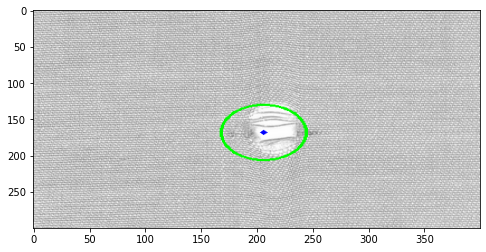

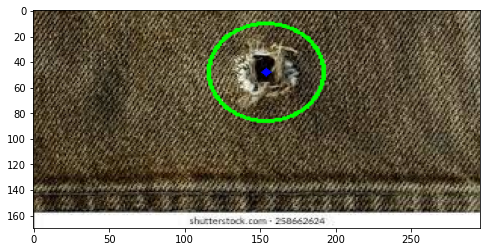

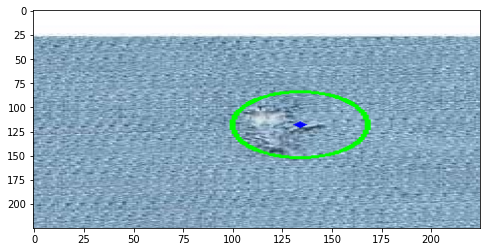

In [142]:
for i in holes:
  f(i)